In [ ]:
# 4장 모델 훈련

In [ ]:
import sys
assert sys.version_info >= (3,5)

import sklearn 
assert sklearn.__version__ > = "0.20"

# 공통 모듈 임포트
import numpy as np

# 선형회귀

In [ ]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100,1)

NameError: ignored

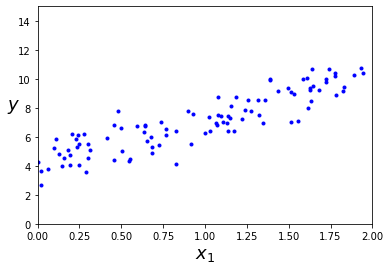

In [ ]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis ([0, 2, 0, 15])

save_fig("generated_data_plot")
plt.show()

### 정규방정식
$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [ ]:
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) 
# 위의 정규방정식의 theta 를 계산하고, 그 중에 가장 좋은 theta 를 선택

In [ ]:
theta_best

array([[4.08424795],
       [3.11753167]])

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [ ]:
# 위에서 계산한 theta 를 X값에 넣었을 경우, 예측값 y_hat 을 구할 수 있다

X_new = np.array([[0], [2]]) # x 점이 2개
X_new_b = np.c_[np.ones((2, 1)), X_new] # 모든 샘플에 x0= 1을 추가한다
# np.c_ 를 사용하기 때문에 위의 로직은 [[1], [1]] 으로 된 값과 X_new 값을 열 방향으로 추가해줌 
# 원래 값은 0, 2였는데 x0을 추가해준 것이나 다름없다
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.08424795],
       [10.31931129]])

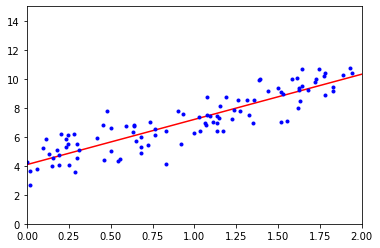

In [ ]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

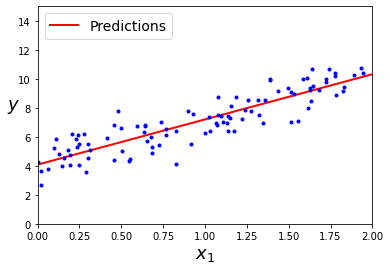

In [ ]:
plt.plot(X_new, y_pred, 'r-', linewidth = 2, label = 'Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$', fontsize = 18)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 14)
plt.axis([0, 2, 0, 15])

plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_
# 절편값과 회귀계수를 의미함

(array([4.08424795]), array([[3.11753167]]))

In [ ]:
lin_reg.predict(X_new)
# 학습한 모델에 X_new 값을 넣어 y_hat 인 예측값을 받아냄

array([[ 4.08424795],
       [10.31931129]])

Linear Regression 클래스는 scipy.linalg.lstsq() 함수를 사용하므로 이 함수 직접 사용도 가능함

In [ ]:
# scipy.lstsq() 함수를 사용하려면 scipy.linalg.lstsq(X_b, y)와 같이 쓴다
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6, ) 
# rcond 는 cut-off 비율을 의미함
# 순위 결정을 위해 특이값은 rcond 값의 가장 큰 특이값보다 작으면 0으로 처리됨

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 유사역행렬 (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). np.linalg.pinv()을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

$\boldsymbol{\hat{\theta}} = \mathbf{X}^{-1}\hat{y}$

In [ ]:
np.linalg.pinv(X_b).dot(y) # 역행렬을 구하지 못하는 경우도 발생한다. 그러할 경우, pinv 를 사용하여 유사역행렬을 구하고, 거기서 theta_best 를 구한다

array([[4.08424795],
       [3.11753167]])


## **경사 하강법**

### 배치 경사 하강법

식 4-6: 비용 함수의 그레이디언트 벡터

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

식 4-7: 경사 하강법의 스텝

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

In [ ]:
eta = 0.1 # 학습률
n_iterations = 1000
m = 100

theta= np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y) # 이 부분은 위의 비용함수 그라디언트 벡터를 표현한 것
    theta = theta - eta * gradients #그리고 다음번의 theta 를 옆과 같이 표현함

In [ ]:
theta

array([[4.08424795],
       [3.11753167]])

In [ ]:
X_new_b.dot(theta)

array([[ 4.08424795],
       [10.31931129]])

In [ ]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path = None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients 
        if theta_path is not None :
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize = 18)
    plt.axis ([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize = 16)

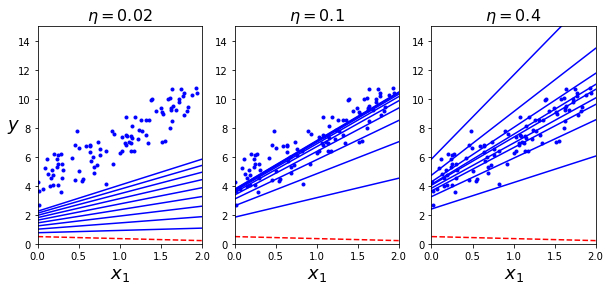

In [ ]:
np.random.seed(42)

theta = np.random.randn(2,1) # 랜덤하게 초기화 함

plt.figure(figsize = (10,4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel('$y$', rotation = 0, fontsize = 18)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path = theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.4)

plt.show()

# 아래 표는 이렇게 해석할 수 있다
# 만약 eta, 학습률이 0.02 수준이라면, 회귀식은 빨간색 부터 시작해서 실제 값까지 가지 못하게 된다
# 만약 eta , 학습률이 0.1 수준이라면, 빨간선에서 시작한 선이 점점 위로 빠르게 올라가 금방 수렴하게 된다
# 만약 eta, 학습률이 0.4 수준이라면, 빨간선에서 원래 값을 넘어 선 수준까지 회귀식이 올라가게 된다.

## 확률적 경사 하강법

In [ ]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

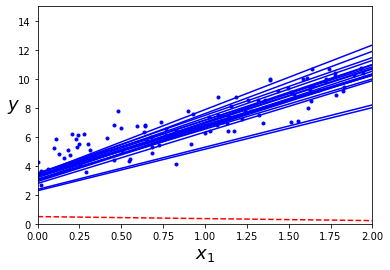

In [ ]:
n_epochs = 50
t0, t1 = 5, 50 # 학습 스케쥴 하이퍼파라미터, 어디에서 사용되는지는 이후에 확인 가능

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # 랜덤 초기화

for epoch in range(n_epochs): # n에포크 만큼 반복한다 
    for i in range(m): # 한 반복에서 m번 되풀이함 (m은 훈련 셋에 있는 샘플 갯수)
        if epoch == 0 and i < 20:  # 만약 에포크가 0이고, i 가 20 이하라면? 
            y_predict = X_new_b.dot(theta) #위에서 볼 수 있었던 그 회귀 방정식에 집어넣고 y_hat 을구한다
            style= 'b-' if i > 0 else 'r--' # style 지정
            plt.plot(X_new, y_predict, style)

        random_index = np.random.randint(m) # m개의 난수를 생성해서 인덱스로 둠
        xi = X_b[random_index:random_index +1] # xi 값을 지정
        yi = y[random_index: random_index +1] # y값을 지정

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients 
        theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.axis([0, 2, 0, 15])

plt.show()


In [ ]:
theta # 이떄의 세타

array([[4.11049332],
       [3.13145115]])

In [ ]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1, random_state = 42)
sgd_reg.fit(X, y.ravel())

# 최대 1000번 에포크 동안 실행 (max_iter = 1000)
# 한 에포크에서 0.001보다 적게 손실이 줄어들 때까지 실행 : tol = 1e-3
# 학습률0.3 : eta=0.1 로 기본 학습스케쥴과 다름
# 패널티는 사용하지 않음 penalty = None

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_
# 위의 정규방정식 값과 유사하다

(array([4.06760946]), array([3.13512011]))

## 미니배치 경사하강법
- 각 스텝에서 전체 훈련 세트나 하나의 샘플을 기반으로 그래디언트를 계산하는 것이 아님
- 미니배치라고 부르는 작은 샘플 세트에 대해 그레디언트를 계산한다
- 확률적 경사하강법 대비하여, 미니배치 경사항법은 행렬 연산이 가능한 GPU 에서 성능 향상을 구경할 수 있음

- 미니배치를 크게 할 경우, SGD 보다 덜 불규칙하게 움직이면서 빠르게 최솟값으로 수렴이 가능
- local 최솟값에서 빠져나오는 것은 조금 더 힘들긴 함

In [ ]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0

for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    for i in range(0, m, minibatch_size):
        t += 1 
        xi =X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 / minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients 
        theta_path_mgd.append(theta)

In [ ]:
theta

array([[4.04297742],
       [3.08288643]])

In [ ]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

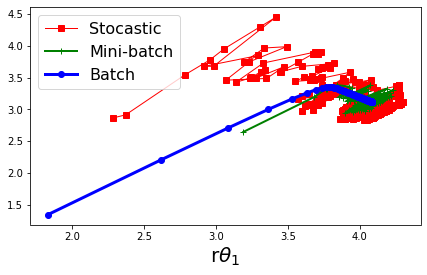

In [ ]:
plt.figure(figsize = (7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label = 'Stocastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2, label = 'Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3, label = 'Batch')

plt.legend(loc = 'upper left', fontsize = 16)
plt.xlabel(r"r$\theta_0$", fontsize  = 20)
plt.xlabel(r"r$\theta_1$", fontsize  = 20, rotation = 0)
plt.axis =([2.5, 4.5, 2.3, 3.9])

plt.show()

### 정리
- sklearn.linear_model 내 SGDRegressor 를 사용하여, 확률적 경사하강법, 배치 / 미니배치 경사하강법 구현이 가능
- 모두 중복은 허용하지 않는 수준에서 배치를 구성
    - 배치 경사 하강법 : 모든 데이터를 1개의 배치라고 생각하여, 모든 데이터 학습이 끝난 뒤에 그래디언트를 업데이트
    - 미니 배치 경사 하강법 : 적정 수준의 미니 배치 크기를 구성하여, 그만큼 데이터 학습 후 그래디언트 업데이트
    - 확률적 경사 하강법 : 데이터 한 줄씩 읽고 그래디언트 업데이트
- 미니배치, 배치의 경우 행렬곱을 사용하여 theta, y_hat 계산을 시도


In [ ]:
np.mean([37,  24])  + np.std([37,  24]) / np.sqrt((61)) * 1.96

32.131189850345095

In [ ]:
np.std([37 * 37 / 190 , 42 * 42 / 190])  / np.sqrt((61)) * 1.96

0.26085829590538956

In [ ]:
np.mean([3,4 ,8, 10, 11,12,15,16,22,29,32,35,35,37,56,61,64,65,68,70,79])

34.857142857142854

In [ ]:
np.mean([23,24,28,30,31,32,35,36,42,49,52,55,55,57,76,81,84,85,88,90,99])

54.857142857142854

In [ ]:
np.var([3,4 ,8, 10, 11,12,15,16,22,29,32,35,35,37,56,61,64,65,68,70,79])

596.6938775510205

In [ ]:
np.var([23,24,28,30,31,32,35,36,42,49,52,55,55,57,76,81,84,85,88,90,99])

596.6938775510205

In [ ]:
np.std([3,4 ,8, 10, 11,12,15,16,22,29,32,35,35,37,56,61,64,65,68,70,79]) / np.mean([3,4 ,8, 10, 11,12,15,16,22,29,32,35,35,37,56,61,64,65,68,70,79])

0.7007837206769402

In [ ]:
np.std([23,24,28,30,31,32,35,36,42,49,52,55,55,57,76,81,84,85,88,90,99]) / np.mean([23,24,28,30,31,32,35,36,42,49,52,55,55,57,76,81,84,85,88,90,99])

0.44528965584680574